<a href="https://colab.research.google.com/github/HelloWorld33333/Pork/blob/main/Asteroids_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Asteroids_Classification**

데이터는 NeoWs(Near Earth Object Web Service)에 기반한 정보로 구성되어 있습니다. 소행성이 지구에 가장 가깝게 접근한 날짜, NASA JPL 소체 ID로 특정 되어있는 소행성, 잠재적 위험이 있는 소행성 등의 정보로 이루어져 있습니다.

저는 이 데이터로 소행성의 위험도를 관여하는 요소가 무엇인지 알아보고(Insight), 지구에 근접하는 소행성의 위험 여부를 판단하는 모델(Learning Model)을 만드려고 합니다.

### **소행성 데이터를 선택한 이유는?**
배경 지식이 전무한 데이터라도 이번 Section에서 배운 머신러닝 모델과 문제 해결 방법을 사용해 문제 해결에 얼마나 적용할 수 있는지에 대해 검증하기 위해 관심 외의 문제를 선정했습니다.

In [239]:
import pandas as pd
import io

from google.colab import files
myfile = files.upload()

df = pd.read_csv(io.BytesIO(myfile['nasa.csv']))

Saving nasa.csv to nasa (3).csv


In [240]:
"""


Feature 소개

Neo Reference ID : 소행성에 할당된 참조 ID
Name : 소행성 이름
Absolute Magnitude : 소행성의 절대 등급

Est Dia in KM(min) : 소행성의 최소 추정 지름(Km)
Est Dia in KM(max) : 소행성의 최대 추정 지름(Km)
Est Dia in M(min) : 소행성의 최소 추정 지름(M)
Est Dia in M(max) : 소행성의 최대 추정 지름(M)
Est Dia in Miles(min) : 소행성의 최소 추정 지름(Miles)
Est Dia in Miles(max) : 소행성의 최대 추정 지름(Miles)
Est Dia in Feet(min) : 소행성의 최소 추정 지름(Feet)
Est Dia in Feet(max) : 소행성의 최대 추정 지름(Feet)

Close Approach Date : 지구 접근 날짜
Epoch Date Close Approach : 소행성이 지구에 접근한 총 시간(초 단위)

Relative Velocity km per sec : 초당 킬로미터 단위로 소행성의 상대 속도
Relative Velocity km per hr : 시간당 킬로미터 단위로 소행성의 상대 속도
Miles per hour : 시간당 마일 단위의 소행성의 상대 속도

Miss Dist.(Astronomical) : 지구에서 지나간 거리(천문)
Miss Dist.(lunar) : 지구에서 지나간 거리(음력)
Miss Dist.(kilometers) : 지구에서 지나간 거리(Km)
Miss Dist.(miles) : 지구에서 지나간 거리(마일)

Orbiting Body : 소행성이 회전하고 있는 행성
Orbit ID : NASA에서 소행성의 궤도를 결정하는 데 사용하는 솔루션 ID
Orbit Determination Date : 소행성의 궤도가 계산된 날짜와 시간
Orbit Uncertainity : 계산된 궤도의 불확실성 측정(0 ~ 9)

Minimum Orbit Intersection : 지구 궤도와 소행성 사이의 교차점의 최소 거리(천문 단위)

Jupiter Tisserand Invariant : 목성 Tisserand 매개변수, 천체와 여러 궤도 요소(반장축, 궤도 이심률 및 기울기)에서 계산된 값, 혜성("목성 가족"의 혜성)과 소행성을 구별하는 데 사용된다고

Epoch Osculation : 소행성의 위치와 속도를 측정하여 궤도를 계산한 시간
Eccentricity : 소행성 궤도의 이심률 값(축을 중심으로 각 궤도가 원형에서 얼마나 멀리 떨어져 있는지 측정한 것, 행성은 타원 형태인 궤도를 띄기 때문에 측정이 가능함)
Semi Major Axis : 소행성 궤도 의 Semi Major Axis 값(이심률으로부터 가장 먼 값)
Inclination : 지구 궤도면에 대한 소행성의 궤도 기울기
Asc Node Longitude : 기준점과 소행성의 상승 절점을 지나는 선 사이의 지구 궤도면에 그린 각도

Orbital Period : 소행성의 근일점 거리 값(태양을 공전하는 천체의 경우 거리가 가장 짧은 점이 근일점입니다.)
Perihelion Distance : 궤도의 가장 가까운 지점에서 태양까지의 거리(근일점)
Perihelion Arg : 상승 노드와 근일점 사이의 소행성의 궤도면에 그려진 각도
Aphelion Dist : 소행성의 Aphelion 거리 값(태양계의 궤도 상 가장 먼 점이 원일점)
Perihelion Time : 근일점 단계를 통과하는 소행성의 시간

Mean Anomaly : 평균 운동과 근일점 통과 시간 간의 곱
Mean Motion : 소행성이 궤도를 도는 데 필요한 각속도
Equinox : 기준 좌표계 사용

Hazardous : 소행성의 위험 여부(bool, Target)



"""

'\n\n\nFeature 소개\n\nNeo Reference ID : 소행성에 할당된 참조 ID\nName : 소행성 이름\nAbsolute Magnitude : 소행성의 절대 등급\n\nEst Dia in KM(min) : 소행성의 최소 추정 지름(Km)\nEst Dia in KM(max) : 소행성의 최대 추정 지름(Km)\nEst Dia in M(min) : 소행성의 최소 추정 지름(M)\nEst Dia in M(max) : 소행성의 최대 추정 지름(M)\nEst Dia in Miles(min) : 소행성의 최소 추정 지름(Miles)\nEst Dia in Miles(max) : 소행성의 최대 추정 지름(Miles)\nEst Dia in Feet(min) : 소행성의 최소 추정 지름(Feet)\nEst Dia in Feet(max) : 소행성의 최대 추정 지름(Feet)\n\nClose Approach Date : 지구 접근 날짜\nEpoch Date Close Approach : 소행성이 지구에 접근한 총 시간(초 단위)\n\nRelative Velocity km per sec : 초당 킬로미터 단위로 소행성의 상대 속도\nRelative Velocity km per hr : 시간당 킬로미터 단위로 소행성의 상대 속도\nMiles per hour : 시간당 마일 단위의 소행성의 상대 속도\n\nMiss Dist.(Astronomical) : 지구에서 지나간 거리(천문)\nMiss Dist.(lunar) : 지구에서 지나간 거리(음력)\nMiss Dist.(kilometers) : 지구에서 지나간 거리(Km)\nMiss Dist.(miles) : 지구에서 지나간 거리(마일)\n\nOrbiting Body : 소행성이 회전하고 있는 행성\nOrbit ID : NASA에서 소행성의 궤도를 결정하는 데 사용하는 솔루션 ID\nOrbit Determination Date : 소행성의 궤도가 계산된 날짜와 시간\nOrbit Uncertainity : 계산된 궤도

In [241]:
df

# 40개나 되는 columns에 비해 데이터가 4000개 가량 밖에 되지 않기에 과적합의 위험이 있음을 인지합니다.

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,6.275369e+07,3.899334e+07,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,5.729815e+07,3.560342e+07,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7.622912e+06,4.736658e+06,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,4.268362e+07,2.652237e+07,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,6.101082e+07,3.791037e+07,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,2016-09-08,1473318000000,22.154265,79755.354273,49556.875548,0.041361,16.089413,6.187511e+06,3.844741e+06,Earth,4,2017-04-06 08:24:07,8,0.019777,5.156,2457637.5,0.361512,1.161429,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,2016-09-08,1473318000000,3.225150,11610.539577,7214.337772,0.006469,2.516399,9.677324e+05,6.013211e+05,Earth,2,2017-04-06 08:23:58,6,0.006451,5.742,2458000.5,0.073200,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,2016-09-08,1473318000000,7.191642,25889.910626,16086.983633,0.061009,23.732393,9.126775e+06,5.671115e+06,Earth,17,2017-04-06 08:23:43,6,0.059973,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,37597

In [242]:
# 결측치 확인
df.isnull().sum()

# 결측치 없음

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [243]:
# 중복값 확인
df.duplicated(df.columns).sum()

# 중복값 없음

0

In [244]:
df.info()

# 오브젝트로 이루어진 컬럼 Close Approach Date, Orbiting Body, Orbit Determination Date, Equinox

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [245]:
df['Close Approach Date']
df['Orbit Determination Date']

from datetime import datetime

df['Close Approach Date'] = pd.to_datetime(df['Close Approach Date']) # 지구에 접근했던 날짜
df['Orbit Determination Date'] = pd.to_datetime(df['Orbit Determination Date']) # 소행성의 궤도가 계산된 날짜와 시간
# 소행성의 위험도를 분류하는 데에 필요없는 데이터라서 삭제할 예정

In [246]:
df['Orbiting Body'].value_counts()

# 값이 하나밖에 없어서 삭제할 예정

Earth    4687
Name: Orbiting Body, dtype: int64

In [247]:
df['Equinox'].value_counts()

# 값이 하나밖에 없어서 삭제할 예정

J2000    4687
Name: Equinox, dtype: int64

In [248]:
df_edit = df.drop(['Orbiting Body', 'Equinox', 'Close Approach Date', 'Orbit Determination Date', 'Neo Reference ID', 'Name', 'Orbit ID'], axis = 1)

# 그외 이름, ID값을 포함한 7개의 컬럼 제거

In [249]:
round(df['Hazardous'].value_counts(normalize=True)*100, 1)

# 타깃의 비율이 불균형한 데이터셋임을 알 수 있습니다.

False    83.9
True     16.1
Name: Hazardous, dtype: float64

In [250]:
# 기준 모델 만들기

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

train, test = train_test_split(df_edit, train_size=0.80, test_size=0.20, random_state=2)

target = ['Hazardous']
features = df_edit.drop(['Hazardous'], axis = 1).columns

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [251]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state = 2)

# 데이터가 적어서 cross_val_score을 사용하겠습니다.
scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=5, scoring='precision')

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

print(scores.mean())

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


              precision    recall  f1-score   support

       False       1.00      1.00      1.00       784
        True       0.99      0.99      0.99       154

    accuracy                           1.00       938
   macro avg       1.00      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938

0.9949717514124294


In [252]:
cross_val_score(rf, X_train, y_train.values.ravel(), cv=5, scoring='recall').mean()

0.9800413223140495

In [253]:
cross_val_score(rf, X_train, y_train.values.ravel(), cv=5, scoring='f1').mean()

0.987447261062101

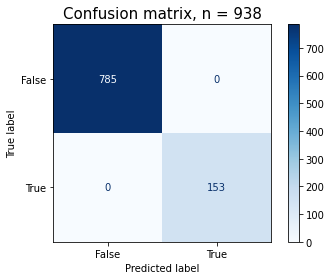

In [254]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(rf, X_test, y_pred, values_format='d', cmap=plt.cm.Blues, ax=ax);
plt.title(f'Confusion matrix, n = {len(y_pred)}', fontsize=15)
plt.show()

# 정밀도, 재현율이 말도 안되는 수치를 보여줍니다. 이 데이터셋은 컬럼이 40개에 비해 데이터가 4000개 남짓으로 과적합을 의심해야할 가능성이 충분합니다. 그렇다면 중요한 피처를 남기고 줄여보겠습니다.
# Feature selection을 사용해 타깃과 연관성이 높은 피처를 선택하겠습니다.

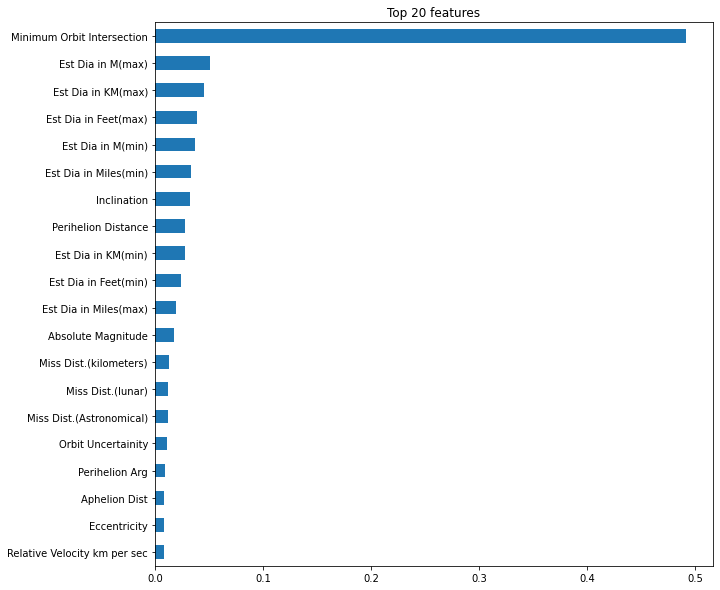

In [255]:
# 특성 중요도
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

# 특성 중요도를 통해 얻은 columns의 신뢰도는 절대적이지 않지만 Minimum Orbit Intersection 피처가 다른 컬럼들에 비해 타깃에 관여하는 수치가 매우 높다는 것을 알 수 있습니다.
# 또한 단위만 다른 피처들이 많이 보임을 알 수 있습니다.
# 먼저 중복인 데이터를 삭제하고 다시 해보겠습니다.

In [256]:
df_edit_2 = df_edit.drop(['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)', 'Relative Velocity km per hr', 'Miles per hour'], axis = 1)

# 단위만 다른 컬럼 11개 제거

In [257]:
train, test = train_test_split(df_edit_2, train_size=0.80, test_size=0.20, random_state=2)

target = ['Hazardous']
features = df_edit_2.drop(['Hazardous'], axis = 1).columns

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]


rf = RandomForestClassifier(random_state = 2, class_weight='balanced')

rf.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

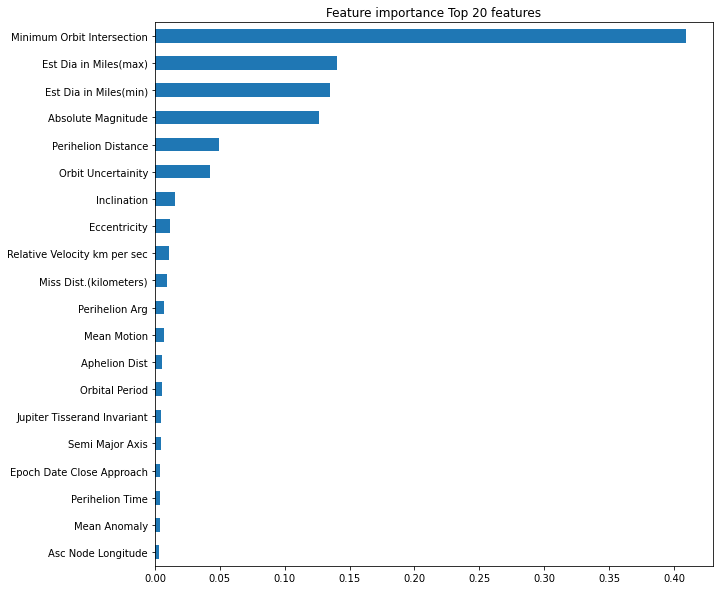

In [258]:
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Feature importance Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [259]:
!pip install eli5

In [260]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(rf, scoring = 'precision', n_iter = 5, random_state = 2)

permuter.fit(X_test, y_test);

In [261]:
feature_names = X_test.columns.tolist()
pre = pd.Series(permuter.feature_importances_, feature_names).reset_index().sort_values('index')
pre[0] = pre[0].abs()
pre.sort_values(0, ascending = False)

,index,0
7,Minimum Orbit Intersection,0.683300
15,Perihelion Distance,0.003947
12,Inclination,0.002640
10,Eccentricity,0.002632
17,Aphelion Dist,0.002632
0,Absolute Magnitude,0.001973
6,Orbit Uncertainity,0.001333
5,Miss Dist.(kilometers),0.001324
4,Relative Velocity km per sec,0.001316
16,Perihelion Arg,0.001316


In [262]:
permuter = PermutationImportance(rf, scoring = 'recall', n_iter = 5, random_state = 2)

permuter.fit(X_test, y_test);

feature_names = X_test.columns.tolist()
rec = pd.Series(permuter.feature_importances_, feature_names).reset_index().sort_values('index')

rec[0] = rec[0].abs()
rec.sort_values(0, ascending = False)

,index,0
7,Minimum Orbit Intersection,0.487013
2,Est Dia in Miles(max),0.120779
1,Est Dia in Miles(min),0.083117
0,Absolute Magnitude,0.080519
6,Orbit Uncertainity,0.003896
12,Inclination,0.002597
18,Perihelion Time,0.002597
20,Mean Motion,0.002597
11,Semi Major Axis,0.002597
15,Perihelion Distance,0.001299


In [263]:
rec = rec.drop(['index'], axis = 1)

In [264]:
permuter = PermutationImportance(rf, scoring = 'roc_auc', n_iter = 5, random_state = 2)

permuter.fit(X_test, y_test);

feature_names = X_test.columns.tolist()
f1 = pd.Series(permuter.feature_importances_, feature_names).reset_index().sort_values('index')
f1[0] = f1[0].abs()
f1.sort_values(0, ascending = False)

,index,0
7,Minimum Orbit Intersection,0.171630
0,Absolute Magnitude,0.001942
1,Est Dia in Miles(min),0.001649
2,Est Dia in Miles(max),0.001450
5,Miss Dist.(kilometers),0.000166
6,Orbit Uncertainity,0.000108
17,Aphelion Dist,0.000064
15,Perihelion Distance,0.000047
10,Eccentricity,0.000046
18,Perihelion Time,0.000036


In [265]:
f1 = f1.drop(['index'], axis = 1)

In [266]:
permuter = PermutationImportance(rf, scoring = 'roc_auc', n_iter = 5, random_state = 2)

permuter.fit(X_test, y_test);

feature_names = X_test.columns.tolist()
roau = pd.Series(permuter.feature_importances_, feature_names).reset_index().sort_values('index')
roau[0] = roau[0].abs()
roau.sort_values(0, ascending = False)

,index,0
7,Minimum Orbit Intersection,0.171630
0,Absolute Magnitude,0.001942
1,Est Dia in Miles(min),0.001649
2,Est Dia in Miles(max),0.001450
5,Miss Dist.(kilometers),0.000166
6,Orbit Uncertainity,0.000108
17,Aphelion Dist,0.000064
15,Perihelion Distance,0.000047
10,Eccentricity,0.000046
18,Perihelion Time,0.000036


In [267]:
roau = roau.drop(['index'], axis = 1)

In [268]:
cat = pd.concat([pre, rec, f1, roau], axis=1)
cat.columns = ['index', 'pre', 'rec', 'f1', 'roau']
cat['sum'] = cat['pre'] + cat['rec'] + cat['f1'] + cat['roau']

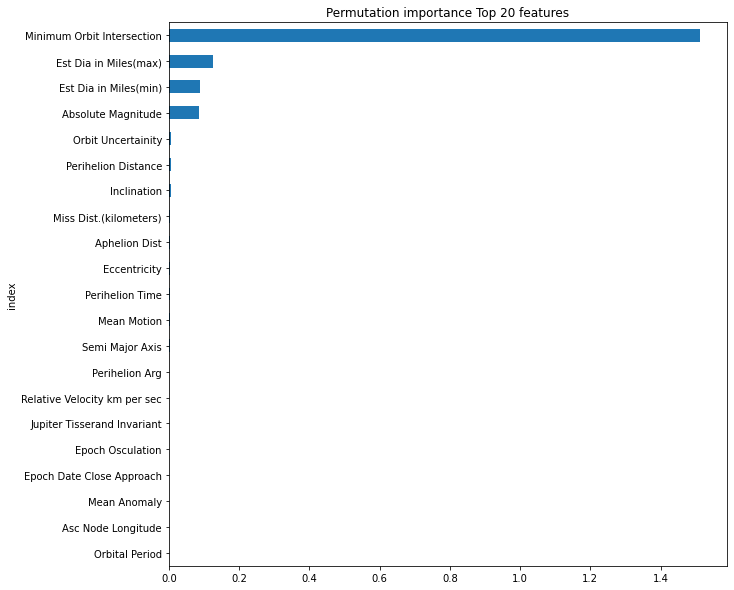

In [269]:
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Permutation importance Top {n} features')
cat.groupby('index')['sum'].sum().sort_values().plot.barh();

# 특성 중요도와 순열 중요도를 비교하면서 중요한 피처를 선택하겠습니다.
# 순열 중요도를 참고하니 Minimum Orbit Intersection을 제외한 다른 피처들은 유의미한 값이 나오지 않았습니다.
# 그렇다면 Minimum Orbit Intersection 피처가 데이터 누수를 의심해야 합니다.

In [270]:
from sklearn.model_selection import cross_val_score

In [271]:
# !pip uninstall graphviz

!pip install graphviz

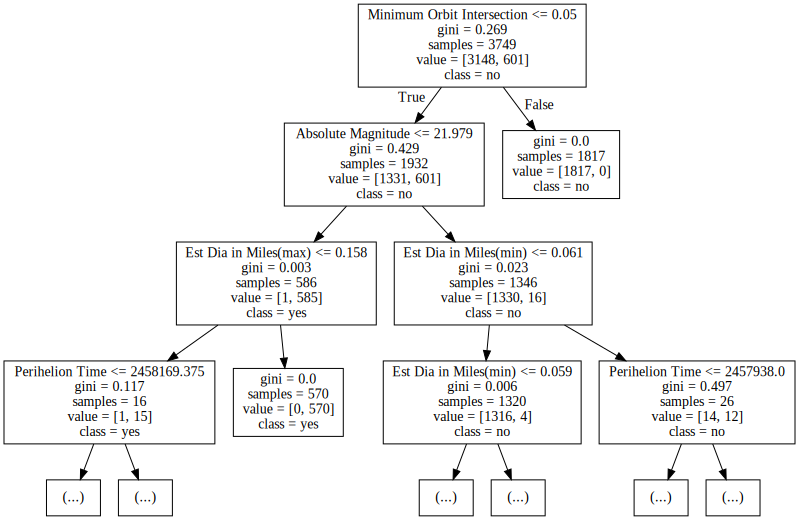

In [272]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

X_train_1 = train[features]
y_train_1 = train[target]
X_test_1 = test[features]
y_test_1 = test[target]

dtc = DecisionTreeClassifier(random_state = 2)

dtc.fit(X_train, y_train)

dot_data = export_graphviz(
    dtc, 
    feature_names = X_test.columns, 
    class_names = ['no', 'yes'],
    max_depth = 3, # 표현하고 싶은 최대 depth
    precision = 3, # 소수점 표기 자릿수
)

y_pred = dtc.predict(X_test)

display(graphviz.Source(dot_data))

# 결정 트리의 트리를 시각화한 모습인데, 가장 정보 이득이 높은 트리인 Minimum Orbit Intersection 컬럼부터 자식 노드가 생긴 것을 볼 수 있습니다.
# 이는 Minimum Orbit Intersection 피처가 타깃에 큰 영향력을 주지만 데이터 누수는 하지 않는다고 할 수 있습니다.
# 그렇다면 피처 별 상관 계수를 계산해 피처 간의 높은 상관관계를 갖는 필요없는 피처를 삭제하겠습니다.

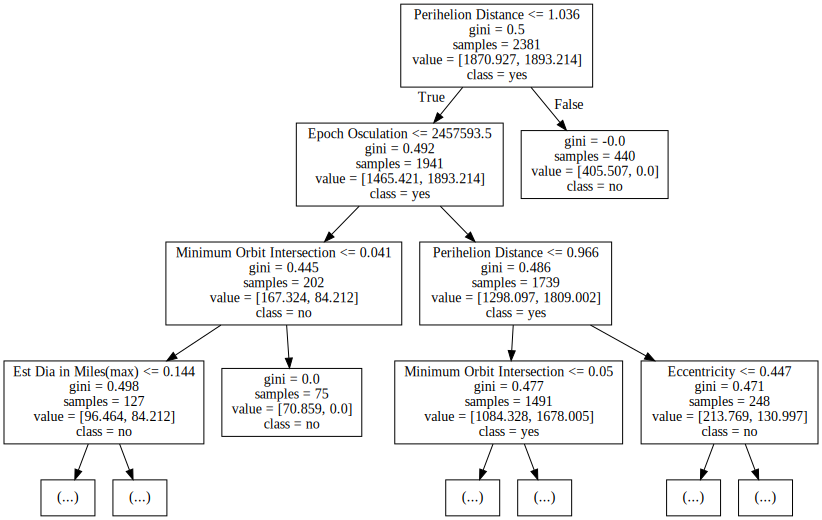

In [273]:
X_train_2 = train[features]
y_train_2 = train[target]
X_test_2 = test[features]
y_test_2 = test[target]

estimator = rf.estimators_[1]

dot_data = export_graphviz(
    estimator, 
    feature_names = X_test.columns, 
    class_names = ['no', 'yes'],
    max_depth = 3, # 표현하고 싶은 최대 depth
    precision = 3, # 소수점 표기 자릿수
)

display(graphviz.Source(dot_data))

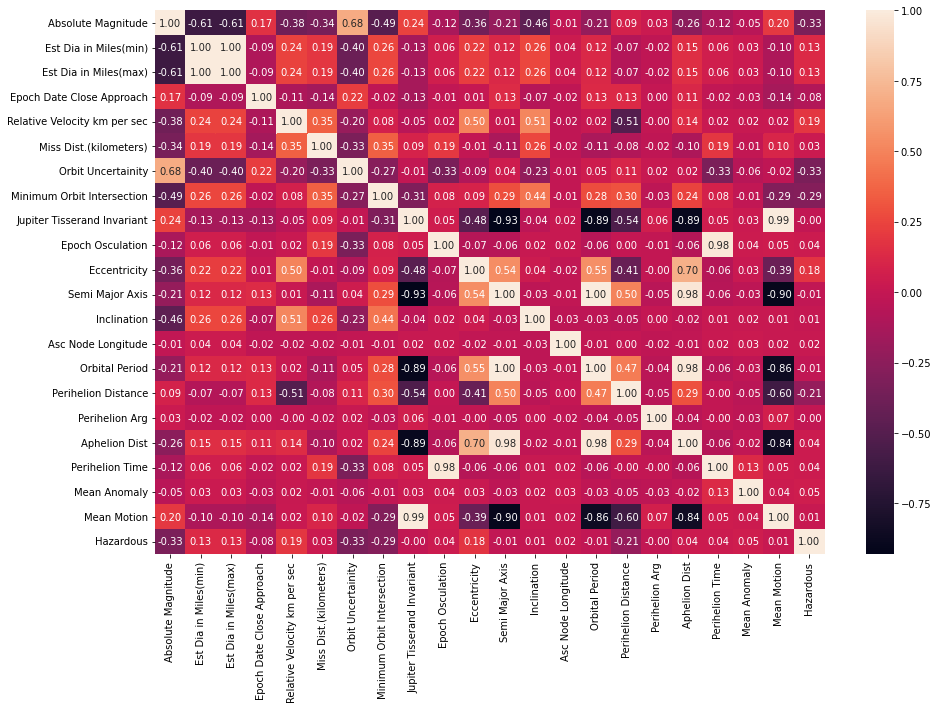

In [274]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(df_edit_2.corr(), annot=True, fmt = '.2f')

In [275]:
# Est Dia in Miles(min), Est Dia in Miles(max)
# Jupiter Tisserand Invariantm, Mean Motion
# Epoch Osculation, Perihelion Time
# Semi Major Axis, Orbital Period, Aphelion Dist 

# 서로간의 상관 관계가 높은 컬럼들 중 영향력이 적은 아래 5개의 컬럼들을 삭제하겠습니다.
# Est Dia in Miles(min), Mean Motion, Semi Major Axis, Orbital Period, Epoch Osculation

In [276]:
train, test = train_test_split(df_edit_2, train_size=0.80, test_size=0.20, random_state=2)

target = ['Hazardous']
#features = ['Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Absolute Magnitude', 'Orbit Uncertainity', 'Inclination', 'Perihelion Distance', 'Miss Dist.(kilometers)', 'Jupiter Tisserand Invariant', 'Perihelion Arg', 'Mean Motion', 'Minimum Orbit Intersection']
features = df_edit_2.drop(['Epoch Osculation', 'Hazardous', 'Est Dia in Miles(min)', 'Mean Motion', 'Semi Major Axis', 'Orbital Period'], axis = 1).columns

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

rf = RandomForestClassifier(random_state = 2)

cv_pre = round(cross_val_score(rf, X_train, y_train.values.ravel(), cv=5, scoring='precision').mean(), 2)
cv_rec = round(cross_val_score(rf, X_train, y_train.values.ravel(), cv=5, scoring='recall').mean(), 2)
cv_f1 = round(cross_val_score(rf, X_train, y_train.values.ravel(), cv=5, scoring='f1').mean(), 2)
cv_roc = round(cross_val_score(rf, X_train, y_train.values.ravel(), cv=5, scoring='roc_auc').mean(), 2)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(cv_pre, cv_rec, cv_f1, cv_roc)

# 컬럼을 줄여도 변화가 없어서 이번에는 SelectKBest를 이용해 컬럼을 조절하겠습니다.

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.99 0.99 0.99 1.0


In [277]:
from sklearn.feature_selection import chi2, SelectKBest

train, test = train_test_split(df_edit_2, train_size=0.80, test_size=0.20, random_state=2)

target = ['Hazardous']
#features = ['Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Absolute Magnitude', 'Orbit Uncertainity', 'Inclination', 'Perihelion Distance', 'Miss Dist.(kilometers)', 'Jupiter Tisserand Invariant', 'Perihelion Arg', 'Mean Motion', 'Minimum Orbit Intersection']
features = df_edit_2.drop(['Epoch Osculation', 'Hazardous', 'Est Dia in Miles(min)', 'Mean Motion', 'Semi Major Axis', 'Orbital Period'], axis = 1).columns

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

selector = SelectKBest(score_func=chi2, k=10)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

rf = RandomForestClassifier(random_state = 2)

cv_pre = round(cross_val_score(rf, X_train_selected, y_train.values.ravel(), cv=5, scoring='precision').mean(), 2)
cv_rec = round(cross_val_score(rf, X_train_selected, y_train.values.ravel(), cv=5, scoring='recall').mean(), 2)
cv_f1 = round(cross_val_score(rf, X_train_selected, y_train.values.ravel(), cv=5, scoring='f1').mean(), 2)
cv_roc = round(cross_val_score(rf, X_train_selected, y_train.values.ravel(), cv=5, scoring='roc_auc').mean(), 2)

rf.fit(X_train_selected, y_train)

y_pred = rf.predict(X_test_selected)

#print(classification_report(y_test, y_pred))
print(cv_pre, cv_rec, cv_f1, cv_roc)
features[selector.get_support()]

# 변화가 없어서 정보획득에 많은 영향을 주었던 Minimum Orbit Intersection 이라는 요소가 중요했다는 사실만 기억하고 삭제한 뒤 변화를 살펴보겠습니다.

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.99 0.99 0.99 1.0


Index(['Absolute Magnitude', 'Est Dia in Miles(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miss Dist.(kilometers)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Asc Node Longitude',
       'Perihelion Distance', 'Mean Anomaly'],
      dtype='object')

In [278]:

train, test = train_test_split(df_edit_2, train_size=0.80, test_size=0.20, random_state=2)

target = ['Hazardous']
#features = ['Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Absolute Magnitude', 'Orbit Uncertainity', 'Inclination', 'Perihelion Distance', 'Miss Dist.(kilometers)', 'Jupiter Tisserand Invariant', 'Perihelion Arg', 'Mean Motion', 'Minimum Orbit Intersection']
features = df_edit_2.drop(['Minimum Orbit Intersection', 'Epoch Osculation', 'Hazardous', 'Est Dia in Miles(min)', 'Mean Motion', 'Semi Major Axis', 'Orbital Period'], axis = 1).columns

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

selector = SelectKBest(score_func=chi2, k=10)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

rf = RandomForestClassifier(random_state = 2)

cv_pre = round(cross_val_score(rf, X_train_selected, y_train.values.ravel(), cv=5, scoring='precision').mean(), 2)
cv_rec = round(cross_val_score(rf, X_train_selected, y_train.values.ravel(), cv=5, scoring='recall').mean(), 2)
cv_f1 = round(cross_val_score(rf, X_train_selected, y_train.values.ravel(), cv=5, scoring='f1').mean(), 2)
cv_roc = round(cross_val_score(rf, X_train_selected, y_train.values.ravel(), cv=5, scoring='roc_auc').mean(), 2)

rf.fit(X_train_selected, y_train)

y_pred = rf.predict(X_test_selected)

#print(classification_report(y_test, y_pred))
print(cv_pre, cv_rec, cv_f1, cv_roc)
features[selector.get_support()]

# 앞으로 사용할 피처는 다음과 같습니다.
# ['Absolute Magnitude', 'Est Dia in Miles(max)','Epoch Date Close Approach', 'Relative Velocity km per sec','Miss Dist.(kilometers)', 'Orbit Uncertainity', 'Eccentricity','Asc Node Longitude', 'Perihelion Distance', 'Mean Anomaly']

# roc_auc가 0.94로 매우 높게 나옴에 따라 하이퍼파라미터를 조금만 건드려도 매우 높은 수치를 기록할 것 같습니다.
# 다음으로 이상치 제거와 모델 선택, 하이퍼파라미터를 조절하겠습니다.

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.75 0.43 0.55 0.94


Index(['Absolute Magnitude', 'Est Dia in Miles(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miss Dist.(kilometers)', 'Orbit Uncertainity', 'Eccentricity',
       'Asc Node Longitude', 'Perihelion Distance', 'Mean Anomaly'],
      dtype='object')

In [279]:
feature = ['Absolute Magnitude', 'Est Dia in Miles(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miss Dist.(kilometers)', 'Orbit Uncertainity', 'Eccentricity',
       'Asc Node Longitude', 'Perihelion Distance', 'Mean Anomaly', 'Hazardous']

df_edit_3 = df_edit_2[feature]
df_edit_3.describe()

,Absolute Magnitude,Est Dia in Miles(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Eccentricity,Asc Node Longitude,Perihelion Distance,Mean Anomaly
count,4687.000000,4687.000000,4.687000e+03,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000
mean,22.267865,0.284283,1.179881e+12,13.970811,3.841347e+07,3.516962,0.382569,172.157275,0.813383,181.167927
std,2.890972,0.513496,1.981540e+11,7.293223,2.181110e+07,3.078307,0.180444,103.276777,0.242059,107.501623
min,11.160000,0.001404,7.889472e+11,0.335504,2.660989e+04,0.000000,0.007522,0.001941,0.080744,0.003191
25%,20.100000,0.046493,1.015574e+12,8.432865,1.995928e+07,0.000000,0.240858,83.081208,0.630834,87.006918
50%,21.900000,0.153954,1.203062e+12,12.917889,3.964771e+07,3.000000,0.372450,172.625393,0.833153,185.718889
75%,24.500000,0.352688,1.355558e+12,18.077649,5.746863e+07,6.000000,0.512411,255.026909,0.997227,276.531946
max,32.100000,21.646663,1.473318e+12,44.633747,7.478160e+07,9.000000,0.960261,359.905890,1.299832,359.917991


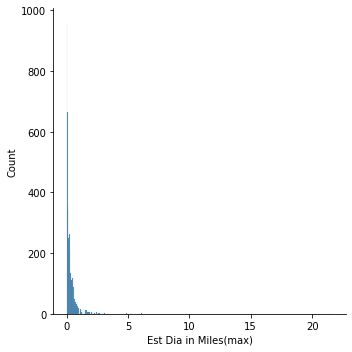

In [280]:
sns.displot(df_edit_3['Est Dia in Miles(max)'])

del_outlier_1 = df_edit_3[(df_edit_3['Est Dia in Miles(max)'] >= 1)].index
df_edit_3 = df_edit_3.drop(del_outlier_1)

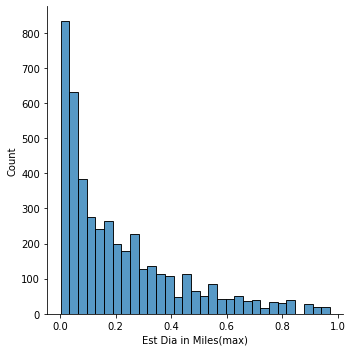

In [281]:
sns.displot(df_edit_3['Est Dia in Miles(max)'])

In [282]:
target = df_edit_3['Hazardous']
features = df_edit_3.drop(['Hazardous'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.80, test_size=0.20, random_state=2, stratify = target)

In [283]:
# 분류 모델은 DecisionTreeClassifier, RandomForest, XgBoost가 있고, 평가 모델은 precision, recall, f1, roc_auc가 있습니다.
# 평가 모델은 우리는 모델이 위험하다고 예측한 것 중에서 정말로 위험한 소행성을 예측하는 비율을 recall을 좀더 비중을 두겠습니다.

from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 2, class_weight='balanced')

cv_pre_xgb = round(cross_val_score(xgb, X_train, y_train.values.ravel(), cv=5, scoring='precision').mean(), 2)
cv_rec_xgb = round(cross_val_score(xgb, X_train, y_train.values.ravel(), cv=5, scoring='recall').mean(), 2)
cv_f1_xgb = round(cross_val_score(xgb, X_train, y_train.values.ravel(), cv=5, scoring='f1').mean(), 2)
cv_roc_xgb = round(cross_val_score(xgb, X_train, y_train.values.ravel(), cv=5, scoring='roc_auc').mean(), 2)

print(cv_pre, cv_rec, cv_f1, cv_roc_xgb)

0.75 0.43 0.55 0.92


In [285]:
rf = RandomForestClassifier(random_state = 2, class_weight='balanced')

cv_pre_rf = round(cross_val_score(rf, X_train, y_train.values.ravel(), cv=5, scoring='precision').mean(), 2)
cv_rec_rf = round(cross_val_score(rf, X_train, y_train.values.ravel(), cv=5, scoring='recall').mean(), 2)
cv_f1_rf = round(cross_val_score(rf, X_train, y_train.values.ravel(), cv=5, scoring='f1').mean(), 2)
cv_roc_rf = round(cross_val_score(rf, X_train, y_train.values.ravel(), cv=5, scoring='roc_auc').mean(), 2)

print(cv_pre, cv_rec, cv_f1, cv_roc_rf)

print('Precision :', cv_pre)
print('Recall :', cv_rec)
print('F1 score :', cv_f1)
print('Roc_Auc :', cv_roc_rf)

0.75 0.43 0.55 0.93
Precision : 0.75
Recall : 0.43
F1 score : 0.55
Roc_Auc : 0.93


In [286]:
dtc = DecisionTreeClassifier(random_state = 2, class_weight='balanced')

cv_pre_dtc = round(cross_val_score(dtc, X_train, y_train.values.ravel(), cv=5, scoring='precision').mean(), 2)
cv_rec_dtc = round(cross_val_score(dtc, X_train, y_train.values.ravel(), cv=5, scoring='recall').mean(), 2)
cv_f1_dtc = round(cross_val_score(dtc, X_train, y_train.values.ravel(), cv=5, scoring='f1').mean(), 2)
cv_roc_dtc = round(cross_val_score(dtc, X_train, y_train.values.ravel(), cv=5, scoring='roc_auc').mean(), 2)

print(cv_pre, cv_rec, cv_f1, cv_roc_dtc)

0.75 0.43 0.55 0.73


In [287]:
# RandomForest와 XGBoost를 비교했을 때 일반적으로 XGBoost가 성능이 더 좋다고 하니 XGBoost를 사용하겠습니다. 
# 다음으로 Randomized Search CV와 GridSearch CV를 사용해, 최적의 하이퍼 파라미터를 찾아보겠습니다.
# 또한 False, True의 비율을 맞춰주기 위해 scale_pos_weight을 사용하겠습니다.

from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler


pipe = make_pipeline(
    MinMaxScaler(),
    XGBClassifier(random_state = 2, scale_pos_weight=83.9/16.1, class_weight='balanced')
)


param_grid = {
        'xgbclassifier__max_depth': [6, 10, 15, 20, 25, 30],
        'xgbclassifier__learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'xgbclassifier__n_estimators': [150, 200, 250]
}

clf = RandomizedSearchCV(
    pipe, param_grid, 
    n_iter=50, 
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1, refit=True
)

clf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('minmaxscaler',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            class_weight='balanced',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            gamma=0,
      

In [288]:
clf.best_params_

{'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__max_depth': 30,
 'xgbclassifier__n_estimators': 150}

In [289]:
pipe = clf.best_estimator_

In [290]:
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
clf.best_score_

              precision    recall  f1-score   support

       False       0.94      0.92      0.93       756
        True       0.62      0.66      0.64       141

    accuracy                           0.88       897
   macro avg       0.78      0.79      0.78       897
weighted avg       0.89      0.88      0.88       897



0.9350415883144231

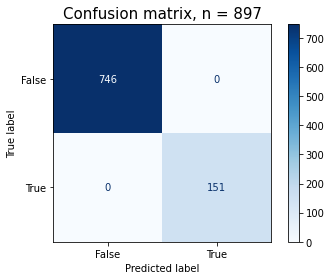

In [291]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_test, y_pred, values_format='d', cmap=plt.cm.Blues, ax=ax);
plt.title(f'Confusion matrix, n = {len(y_pred)}', fontsize=15)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'xgbclassifier__n_estimators' : [220, 230, 240],
    'xgbclassifier__max_depth': [27],
    'xgbclassifier__learning_rate': [0.1, 0.125, 0.15, 0.175],
    'xgbclassifier__gamma' : [0, 0.5, 1]
}

grid = GridSearchCV(pipe, param_grid=params, cv=3, refit=True)

grid.fit(X_train, y_train)

In [293]:
pipe = grid.best_estimator_

y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
grid.best_score_

              precision    recall  f1-score   support

       False       0.93      0.93      0.93       756
        True       0.63      0.62      0.63       141

    accuracy                           0.88       897
   macro avg       0.78      0.78      0.78       897
weighted avg       0.88      0.88      0.88       897



0.8887029288702929

In [294]:
grid.best_params_

{'xgbclassifier__gamma': 0,
 'xgbclassifier__learning_rate': 0.175,
 'xgbclassifier__max_depth': 27,
 'xgbclassifier__n_estimators': 240}

In [295]:
# 임계값 조정
threshold = 0.35

predicted_proba = pipe.predict_proba(X_test)[:, 1]
predicted = (predicted_proba >= threshold)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       False       0.94      0.92      0.93       756
        True       0.60      0.67      0.63       141

    accuracy                           0.88       897
   macro avg       0.77      0.79      0.78       897
weighted avg       0.88      0.88      0.88       897



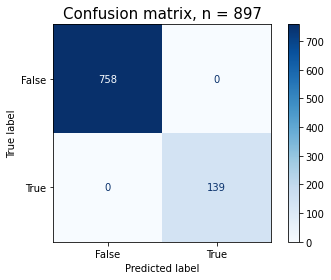

In [302]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_test, y_pred, values_format='d', cmap=plt.cm.Blues, ax=ax);
plt.title(f'Confusion matrix, n = {len(y_pred)}', fontsize=15)
plt.show()

In [296]:
!pip install shap

In [297]:
# 그렇다면 Minimum Orbit Intersection을 제거하고 어떤 요소가 얼마나 타깃에 영향을 주었는지 다음 시각화를 통해 알아보겠습니다.
import shap

model = XGBClassifier(random_state = 2, class_weight='balanced', scale_pos_weight=16.1/83.9, learning_rate = 0.001, max_depth = 25, n_estimators = 150)
model.fit(X_train, y_train)

row = X_test.iloc[[0]]

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs();

shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [298]:
row = X_test.iloc[[1]]

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs();

shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [299]:
row = X_test.iloc[[50]]

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs();

shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [300]:
row = X_test.iloc[[97]]

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs();

shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [301]:
# 그렇다면 Minimum Orbit Intersection이 얼마나 타깃에 영향을 주었는지 다음 시각화를 통해 알아보겠습니다.

In [ ]:
# 위에서 볼 수 있듯이 소행성의 절대 등급과 지구로부터의 거리, 궤도 불확실성, 그리고 근일점이 위험 요소에 많은 영향을 끼치고 있다는 것을 알 수 있습니다.

# 공통적인 사항으로는 절대 등급은 낮을수록 에너지 함유량이 높은 소행성을 의미하므로 절대 등급이 21등급 이하
# 근일점(타원 궤도의 두 점에서 중력원에 가까운 점까지의 거리) 1.1이하
# 궤도의 불확실성이 클 수록 소행성의 위험 등급이 높아짐을 알 수 있습니다.

In [ ]:
# 일반적으로 생각했을 때 소행성이 지구에 충돌했을 때 치명적인 요소는 소행성의 크기와 속도, 그리고 소행성이 방사하는 에너지량을 관여하는 절대 등급일 것입니다.

# 소행성 충돌을 막으려면 수동적으로 소행성의 궤도를 수정하는 것이므로 미리 예방하는 차원에서 궤도와 관련된 피처에서 어느 값부터 위험 수준인지 파악하는 인사이트 도출하면 될듯?
# Inclination의 값의 차이에 따라 타깃값 groupby 정도

# 그렇다면 소행성 궤도에 영향력을 주는 컬럼들은 무엇인지